In [3]:
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]
y = iris['target']

setosa_or_versicolor = (y == 0) | (y == 1)  # 2 class 
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

svm_clf = SVC(kernel='linear', C=9999.9)
svm_clf.fit(X, y)

SVC(C=9999.9, kernel='linear')

[1.29411744 0.82352928]
[-3.78823471]


(0.0, 6.0, 0.0, 2.0)

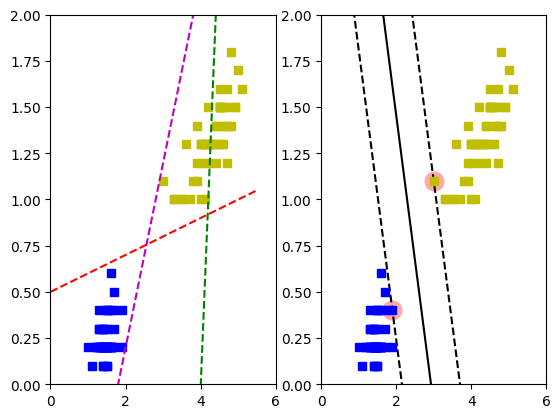

In [11]:
import matplotlib.pyplot as plt

x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax, sv=True):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_
    print(f"{w}\n{b}")
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = - w[0] / w[1] * x0 - b / w[1]
    margin = 1 / w[1]
    gutter_upper = decision_boundary + margin
    gutter_down = decision_boundary - margin
    if sv:
        svs = svm_clf.support_vectors_
        plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, 'k-')
    plt.plot(x0, gutter_upper, 'k--')    
    plt.plot(x0, gutter_down, 'k--') 

plt.subplot(121)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bs')
plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'ys')
plt.plot(x0, pred_1, 'g--')
plt.plot(x0, pred_2, 'm--')    
plt.plot(x0, pred_3, 'r--')    
plt.axis([0, 6, 0, 2])
plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bs')
plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'ys')
plt.axis([0, 6, 0, 2])

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2,3)]
y = (iris["target"] == 2).astype(np.float64)
svm_clf = Pipeline((('std', StandardScaler()),
                    ('linear_svc', LinearSVC(C=1))))
svm_clf.fit(X, y)

Pipeline(steps=[('std', StandardScaler()), ('linear_svc', LinearSVC(C=1))])

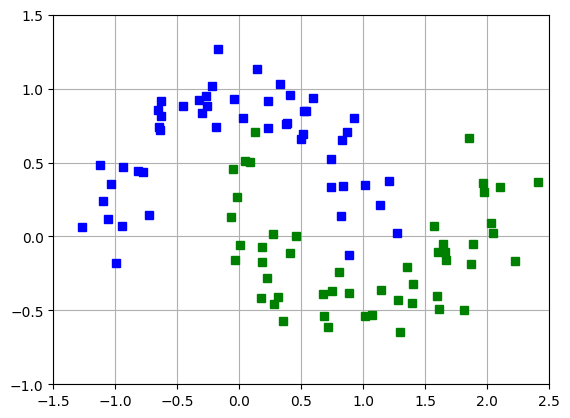

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axis):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bs')
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'gs')
    plt.axis(axis)
    plt.grid(True, which='both')

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC

polynomial_svm_clf = Pipeline((("poly", PolynomialFeatures(degree=3)),
                              ("scaler", StandardScaler()),
                              ("svm_clf", LinearSVC(C=10, loss="hinge"))))
polynomial_svm_clf.fit(X, y)

D:\code\DL4TAG\venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

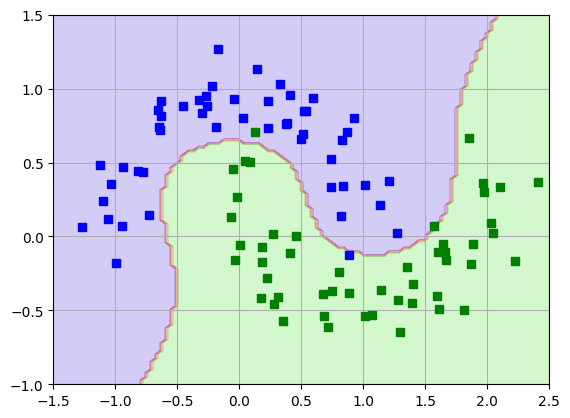

In [10]:
import numpy as np

def plot_predictions(clf, axis):
    x0s = np.linspace(axis[0], axis[1], 100)
    x1s = np.linspace(axis[2], axis[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

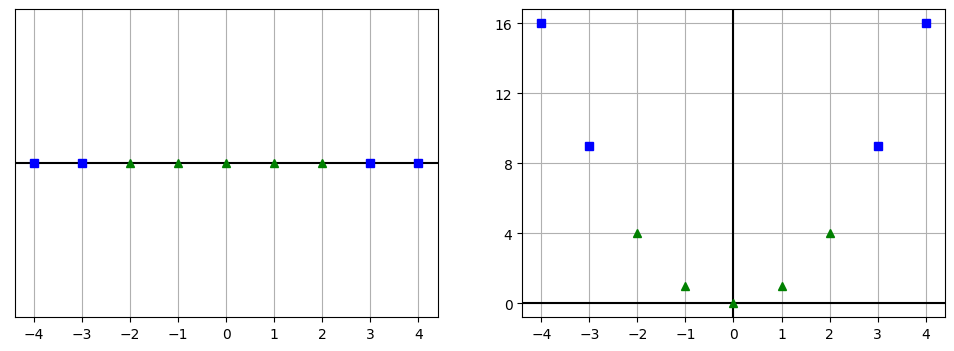

In [12]:
Xd = np.linspace(-4, 4, 9).reshape(-1, 1)
Xd2 = np.c_[Xd, Xd**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.grid(True, which="both")
plt.axhline(y=0, color='k')
plt.plot(Xd[:, 0][y==0], np.zeros(4), "bs")
plt.plot(Xd[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])

plt.subplot(122)
plt.grid(True, which="both")
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(Xd2[:, 0][y==0], Xd2[:, 1][y==0], "bs")
plt.plot(Xd2[:, 0][y==1], Xd2[:, 1][y==1], "g^")
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])

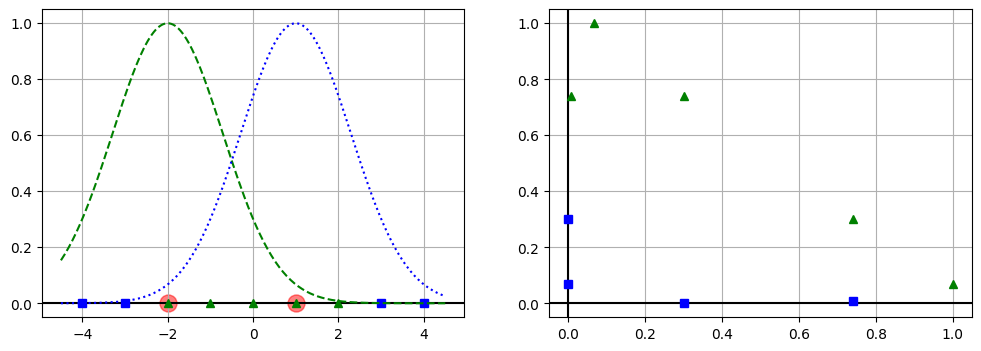

In [13]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3  # the bigger gamma, the smaller mapping data.
x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

Xk = np.c_[gaussian_rbf(Xd, -2, gamma), gaussian_rbf(Xd, 1, gamma)]

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.grid(True, which="both")
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(Xd[:, 0][y==0], np.zeros(4), "bs")
plt.plot(Xd[:, 0][y==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")

plt.subplot(122)
plt.grid(True, which="both")
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(Xk[:, 0][y==0], Xk[:, 1][y==0], "bs")
plt.plot(Xk[:, 0][y==1], Xk[:, 1][y==1], "g^")